# Computational Lab #1: NumPy basics and implicit matrix computations
## Math 56, Winter 2025

See the course [GitHub page](https://github.com/jlindbloom/m56w25/tree/main) to download the notebook. 

The purpose of this assignment is to familiarize you with representing vectors and matrices as NumPy ``ndarray``s, making plots with Matplotlib, and understanding the SciPy ``LinearOperator`` object -- each of these three concepts will be used in labs later in the class. We refer you to the many great Python/NumPy/Matplotlib/SciPy tutorials that exist on the internet, and merely present some exercises for you here.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import LinearOperator

# Problem 1

Write some code that produces the following $10 \times 10$ matrix as a NumPy ``ndarray``:
\begin{align*}
\begin{bmatrix}
1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 \\
1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 \\
1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 \\
1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 \\
1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 \\
\end{bmatrix}
\end{align*}
Use ``plt.imshow(  )`` to plot the matrix, followed by ``plt.colorbar( )`` to include a colorbar.

In [3]:
# Define A here
A = np.ndarray((10, 10), dtype=int)

for i in range(10):
    for j in range(10):
        A[i,j] = (i+j)%2

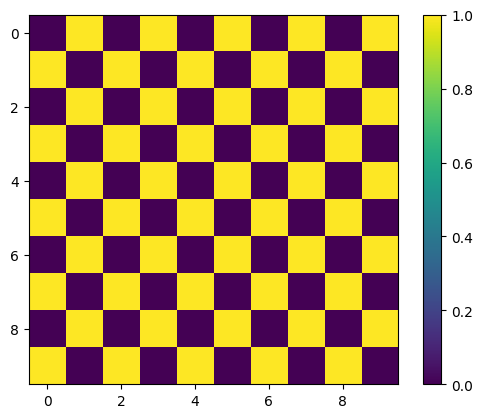

In [4]:
# Then plot
plt.imshow(A)
plt.colorbar()
plt.show()

# Problem 2

**Part (a):** Write a Python function that returns the following $n \times n$ matrix as a NumPy ``ndarray``: 
\begin{align*}
\begin{bmatrix}
1 & -1 & & &  \\
-1 & 2 & -1 & &  \\
& \ddots & \ddots & \ddots  & \\
&  & -1 & 2  & -1 \\
&  &  & -1  & 1
\end{bmatrix}
\end{align*} 
Your function should accept a positive integer $n$ as its input. Then, use ``plt.imshow(  )`` to plot the matrix, followed by ``plt.colorbar( )`` to include a colorbar.

In [23]:
# Fill in with code here
def prob2_matrix(n):
    matrix = np.ndarray((n, n), dtype=int)
    for i in range(n):
        for j in range(n):
            if abs(i-j) > 1:
                matrix[i,j] = 0
            elif abs(i-j) == 1:
                matrix[i,j] = -1
            elif i == j:
                if i == 0 or i == n-1:
                    matrix[i,j] = 1
                else:
                    matrix[i,j] = 2

    return matrix

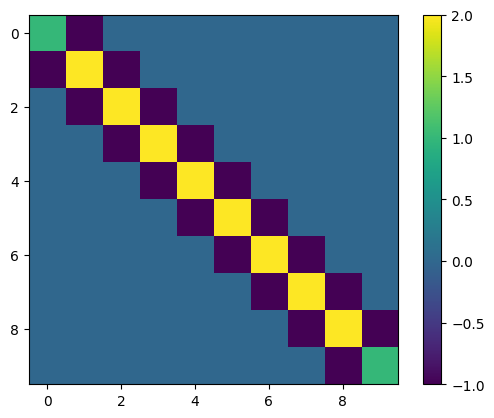

In [26]:
# Then plot
A = prob2_matrix(10)

plt.imshow(A)
plt.colorbar()
plt.show()

**Part (b):** What is the rank of the matrix, in terms of $n$? You may make use of any functions available in NumPy/SciPy to determine this; it can also be determined analytically by inspecting the form of the matrix.

**Response:**

--> *rank is n-1*

In [27]:
from numpy.linalg import matrix_rank
matrix_rank(A) # rank is equal to n-1

np.int64(9)

# Problem 3

**Part (a):** Write a Python function that returns the following $(n-1) \times n$ matrix as a NumPy ``ndarray``: 
\begin{align*}
\begin{bmatrix}
1 & -1 & & &  \\
  & 1 & -1 & &  \\
&  & \ddots & \ddots  & \\
&  &  & 1  & -1 \\
\end{bmatrix}
\end{align*} 
Your function should accept a positive integer $n$ as its input. Then, use ``plt.imshow(  )`` to plot the matrix, followed by ``plt.colorbar( )`` to include a colorbar.

In [28]:
def prob3_matrix(n):
    matrix = np.zeros((n-1, n), dtype=int)  # initialize the matrix with zeros // i couldnt figure out how to do it with np.ndarray
    
    for i in range(n - 1):  
        matrix[i, i] = 1    # diagonal entries
        matrix[i, i + 1] = -1  # off-diagonal entries with diff one
    
    return matrix


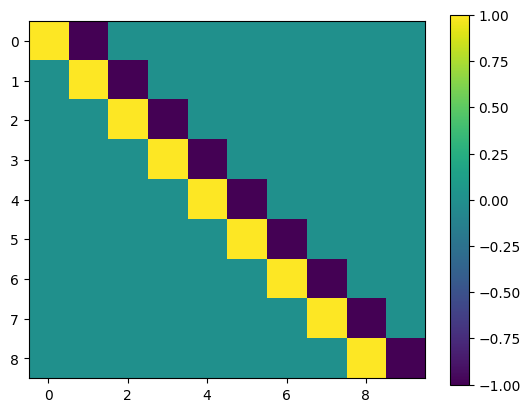

In [29]:
# Then plot
A = prob3_matrix(10)

plt.imshow(A)
plt.colorbar()
plt.show()

**Part (b):** What is the rank of the matrix, in terms of $n$? You may make use of any functions available in NumPy/SciPy to determine this; it can also be determined analytically by inspecting the form of the matrix.

**Response:**

--> *rank is n-1*

In [30]:
from numpy.linalg import matrix_rank

matrix_rank(A)

np.int64(9)

**Part (c):** Let ``A = prob3_matrix(10)`` and ``B = A.T @ A'' (i.e., $B = A^T A$; with NumPy the "@" symbol is shorthand for matrix-matrix multiplication). What do you notice?

**Response:**

*It is the same as the matrix prob_matrix2(10)!*

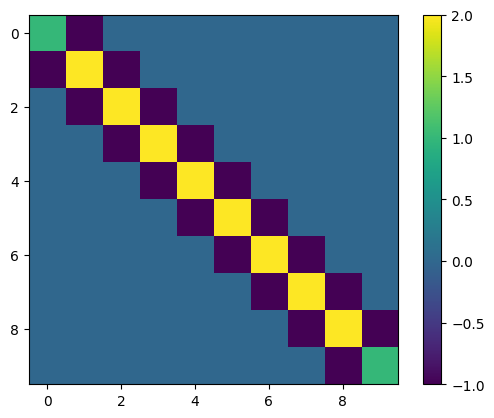

In [31]:
A = prob3_matrix(10)
B = A.T @ A

plt.imshow(B)
plt.colorbar()
plt.show()

# Problem 4

Using matplotlib, reproduce the following plot *exactly* (as close as you can get). You might take a look at the [matplotlib quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html) or other matplotlib documentation available on the internet.

![title](sin_and_cos.png)

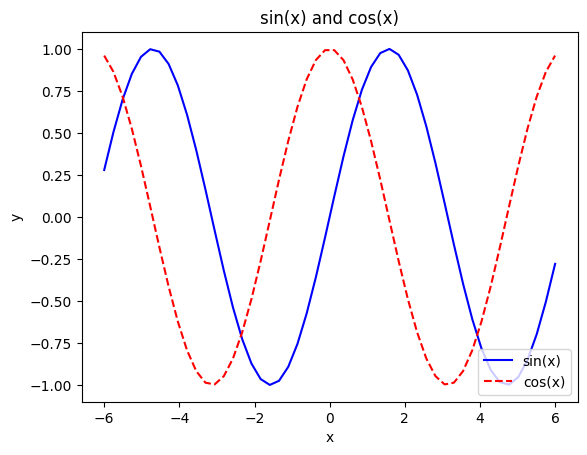

In [ ]:
# re-import the libraries just in case
import numpy as np
import matplotlib.pyplot as plt

# generate x axis
x = np.linspace(-6, 6)

# calculate the sine and cosine values
y_sin = np.sin(x)
y_cos = np.cos(x)

# sine wave
plt.plot(x, y_sin, label='sin(x)', color = 'blue')

# cosine wave
plt.plot(x, y_cos, label='cos(x)', linestyle='--', color = 'red')

# add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin(x) and cos(x)')

# add a legend and put it to the right location
plt.legend(loc = 'lower right')

# show the plot
plt.show()


## A bit on ``LinearOperator``'s

We will often refer to certain matrix-vector or matrix-matrix products as being performed "implicitly", meaning that we assume one can perform operations with these matrices without storing them explicitly and computing these products using the standard matrix-vector product ("matvec") matrix-matrix product ("matmat") algorithms for dense matrices. By referencing these matrices only implicitly, we can gain enormous savings in terms of computational cost as well as memory footprint. Some examples include the permutation matrices arising in Gaussian elimination with pivoting, and the Householder reflectors or  Givens roations that arise in the direct solution of least squares problems. Implicit representations of matrices play an even bigger role when we turn to iterative methods later in the course.

The purpose of the next two questions in the lab are to get you familiar with thinking about certain matrix operations implicitly. In Python, one can represent a matrix implicitly using the [``LinearOperator``](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.LinearOperator.html) class provided by SciPy. If you have not encountered object-oriented programming before, you might read up [here](https://realpython.com/python3-object-oriented-programming/#:~:text=into%20individual%20objects.-,What%20Is%20Object%2DOriented%20Programming%20in%20Python%3F,are%20bundled%20into%20individual%20objects.) so that you understand concepts such as classes, objects, methods, attributes, etc.

Let's walk through a brief example involves refering a diagonal matrix $\mathbf{D} = \operatorname{diag}(\mathbf{d}) \in \mathbb{R}^{n \times n}$ only implicitly. Storing $\mathbf{D}$ (in a dense array format) requires the storage of $n^2$ floating point numbers, and multipling a vector $\mathbf{x}$ by $\mathbf{D}$ using the dense matrix-vector product algorithm costs $n^2$. Yet, it is clear that all of the information about $\mathbf{D}$ is summarized in with just the storage of $n$ floating point numbers and that matvecs should be able to be computed in just $n$ flops. 

Here is a template for a ``DiagonalOperator``:

In [32]:
class DiagonalOperator(LinearOperator):

    def __init__(self, diagonal, dtype=None):

        self.diagonal = diagonal.ravel() # the diagonal of D
        super().__init__(dtype=np.dtype(dtype), shape=(len(self.diagonal), len(self.diagonal))) # defining the dtype and shape of the operator

    # Implementing the matvec operation. The matvec corresponds to just elementwise multiplication of x with the diagonal entries!
    def _matvec(self, x):

        return self.diagonal * x
    
    # The transpose vector product ("rmatvec") is the same as the matvec, since D is symmetric!
    def _rmatvec(self, x):
        
        return self._matvec(x)

In [33]:
diagonal = np.arange(10)
D = DiagonalOperator(diagonal)
x = np.ones(10)

print(f"diagonal: {diagonal}")
print(f"x: {x}")
print(f"Dx: {D @ x}")

diagonal: [0 1 2 3 4 5 6 7 8 9]
x: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Dx: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


A neat thing about the ``LinearOperator`` class is that all of the logic for building the matrix-matrix product as well as handling sums and products of ``LinearOperator``s is already implemented for you. For example, we can represent $D^2$ as

In [34]:
D_squared = D @ D

which does not actually perform the dense matrix-matrix product of the array $D$ with itself, i.e., the operation

In [35]:
D_squared @ x

array([ 0.,  1.,  4.,  9., 16., 25., 36., 49., 64., 81.])

is equivalent to ``D ( D @ x )`` (the parentheses matter) and costs only $2n$ flops.

# Problem 5

Write a subclass of ``LinearOperator`` that implements a permutation operator $\mathbf{P}$. Specifically, given an input vector $\mathbf{x} = [x_0, x_1, \ldots, x_{n-1}]^T \in \mathbb{R}^n$ and a permutation $\sigma : \{ 0, \ldots, n-1 \} \to \{ 0, \ldots, n-1 \}$, the matrix-vector product $\mathbf{Px}$ implemented by the ``_matvec()`` method gives the vector $\mathbf{Px} = [x_{\sigma(0)}, x_{\sigma(1)}, \ldots, x_{\sigma(n-1)}]^T$. 

To implement the transpose matrix-vector product in ``_rmatvec()``, note that permutation transformations are orthogonal, i.e., if $\mathbf{y} = [y_{i_1}, y_{i_2}, \ldots, y_{i_{n-1}}]^T$ then $P^T y = [ y_{\sigma^{-1}(i_1)}, y_{\sigma^{-1}(i_2)}, \ldots, y_{\sigma^{-1}(i_{n-1})} ]^T$, i.e., $P^T$ performs the inverse permutation.

Note that when the permutation operator is applied to a matrix $\mathbf{A}$, it acts on the columns as $\mathbf{P} \mathbf{A} = \mathbf{P} [\mathbf{a}_1, \ldots, \mathbf{a}_n] = [ \mathbf{P} \mathbf{a}_1, \ldots, \mathbf{P} \mathbf{a}_n]$, meaning that $\mathbf{P}$  permutates the rows of $\mathbf{A}$.

In [42]:
## Fill in the _matvec and _rmatvec methods of the PermutationOperator
class PermutationOperator(LinearOperator):

    def __init__(self, new_indices, dtype=None):

        self.new_indices = new_indices
        self.n_entries = len(new_indices)
        self.old_indices = np.zeros_like(new_indices)
        for j, idx in enumerate(self.new_indices):
            self.old_indices[idx] = j

        super().__init__(dtype=np.dtype(dtype), shape=(self.n_entries, self.n_entries))

    def _matvec(self, x):   

        result = x[self.new_indices]
        return result
    
    def _rmatvec(self, x):

        result = x[self.old_indices]
        return result

In [54]:
# Here is a check for you: the first result of the below should be [2, 3, 0, 1, 4], the second should be [0, 1, 2, 3, 4].
# But just because you pass this test does not mean your operator is implemented correctly!

new_indices = [2, 3, 0, 1, 4] # indices defining the permutation
P = PermutationOperator(new_indices) # create permutation operator
x = np.arange(P.shape[1]) # create a test vector

print(f"P @ x: {P @ x}")
print(f"P.T @ P @ x: {P.T @ P @ x}")


print(f"P @ x: {P.matvec(x)}")
print(f"P.T @ P @ x: {P.rmatvec(P.matvec(x))}") ## permuting it back to get the original layout



P @ x: [2 3 0 1 4]
P.T @ P @ x: [0 1 2 3 4]
P @ x: [2 3 0 1 4]
P.T @ P @ x: [0 1 2 3 4]


# Problem 6

When implementing an implicit representation of $A \in \mathbb{R}^{m \times n}$, it is important that the ``matvec`` and ``rmatvec`` operations agree in the sense that
\begin{align}
\forall \mathbf{x} \in \mathbb{R}^n, \forall \mathbb{y} \in \mathbb{R}^m, \quad \langle \mathbf{y}, \mathbf{A} \mathbf{x} \rangle = \langle \mathbf{A}^T \mathbf{y}, \mathbf{x} \rangle.
\end{align}
One way to check this numerically is to check whether 
\begin{align}
\left| \langle \mathbf{y}_i, \mathbf{A} \mathbf{x}_i \rangle - \langle \mathbf{A}^T \mathbf{y}_i, \mathbf{x}_i \rangle  \right| < \varepsilon
\end{align}
for a small tolerance parameter $\varepsilon$ (e.g., $\varepsilon = 10^{-10}$) and set of test vectors $\{ (\mathbf{x}_i, \mathbf{y}_i) \}$. 

**Part (a):** Write a function ``check_adjoint()`` which accepts a ``LinearOperator`` and checks whether the adjoint test is satisfied for a set of `n_trials` random test vectors. The function should return `False` *unless* the adjoint test is satsified for *all* *`n_trials`* pairs of test vectors.

In [21]:
# Fill in code for the function below
def check_adjoint(A, n_trials=10, tol=1e-10):
    m, n = A.shape
    passed_checks = True
    
    for _ in range(n_trials):
        x = np.random.randn(n)
        y = np.random.randn(m)
        
        
        left = np.dot(y, A.matvec(x))
        right = np.dot(A.rmatvec(y), x)
        
        if np.abs(left-right) >= tol:
            passed_checks = False # return false if any test fails
            break

    return passed_checks

**Part (b):** Use your ``check_adjoint()`` function to check whether ``DiagonalOperator`` as well as your implementation of ``PermutationOperator`` passes the adjoint test (if it doesn't, that means your implementation of ``_rmatvec( )`` is incorrect). 

In [53]:
diag = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
D = DiagonalOperator(diag)
print("DiagonalOperator passes adjoint test:", check_adjoint(D))

new_indices = [3, 2, 0, 1, 4]
P = PermutationOperator(new_indices)
print("PermutationOperator passes adjoint test:", check_adjoint(P))



DiagonalOperator passes adjoint test: True
PermutationOperator passes adjoint test: True
